In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import mglearn
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

## 계층적 군집분석

In [2]:
from sklearn.cluster import AgglomerativeClustering

In [3]:
x,y = make_blobs(random_state=1) #데이터 수집

agg = AgglomerativeClustering(n_clusters=3) #모델 선정

assignment = agg.fit_predict(x) #모델 학습,예측값 산출

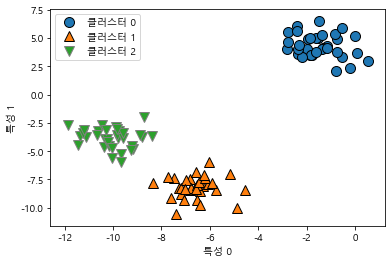

In [4]:
mglearn.discrete_scatter(x[:,0],x[:,1],assignment)
plt.legend(['클러스터 0','클러스터 1','클러스터 2'],loc='best')
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()

In [5]:
from scipy.cluster.hierarchy import dendrogram,ward

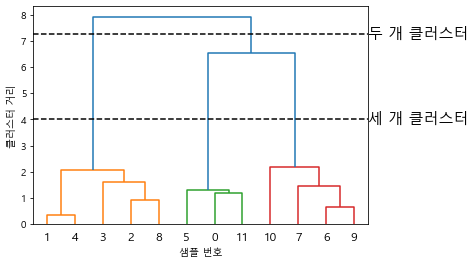

In [6]:
#scipy사용 계층적 군집분석 시각화
x,y = make_blobs(random_state=0,n_samples=12) #데이터 수집

# 데이터 배열 x에 ward함수를 적용해줘야함.
# 거리정보가 담긴 배열을 리턴해줌
linkage_array = ward(x)
# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램
dendrogram(linkage_array)

#두 개 or 세 개 클러스터 구분 -> 클러스터 구분 라인 표시
ax=plt.gca()
bounds=ax.get_xbound()
ax.plot(bounds,[7.25,7.25],'--',c='k')
ax.plot(bounds,[4,4],'--',c='k')

ax.text(bounds[1],7.25,'두 개 클러스터',va='center',fontdict={'size':15})
ax.text(bounds[1],4,'세 개 클러스터',va='center',fontdict={'size':15})
plt.xlabel('샘플 번호')
plt.ylabel('클러스터 거리')
plt.show()

## DBSCAN 

In [7]:
from sklearn.cluster import DBSCAN

In [8]:
x,y = make_blobs(random_state=0,n_samples=12) #데이터 수집

dbscan=DBSCAN() #모델 선정
cluster = dbscan.fit_predict(x) #모델 학습,(변환)예측값 산출

In [9]:
print('클러스터 레이블:\n',cluster)
#결과값 해석 : 군집분석이 안됬다.
#군집 분석을 위한 적절한 특성이 없다면 군집분석이 안될수도 있다.

클러스터 레이블:
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [10]:
x,y=make_moons(n_samples=200,noise=0.05,random_state=0)
#데이터 수집

In [11]:
#스케일링
x_scale = StandardScaler().fit_transform(x)

In [12]:
#dbscan
dbscan=DBSCAN() #모델 선정
cluster = dbscan.fit_predict(x_scale) #모델 학습, 변환 (예측값 산출)

In [13]:
print('클러스터 레이블:\n',cluster)
#2개의 군집으로 나뉨

클러스터 레이블:
 [0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1]


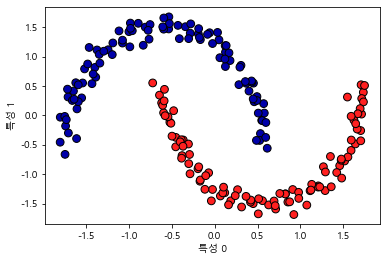

In [14]:
#DBSCAN 시각화
plt.scatter(x_scale[:,0],x_scale[:,1],c=cluster,cmap=mglearn.cm2,
           s=60,edgecolors='black')
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()